In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%load_ext autoreload
%autoreload 2

# Data viz

In [3]:
file = "../raw_data/mta_1706.csv"
data = pd.read_csv(file, on_bad_lines="skip")

data.head(10)

RecordedAtTime  DirectionRef PublishedLineName  \
0  2017-06-01 00:03:34             0                B8   
1  2017-06-01 00:03:43             1               S61   
2  2017-06-01 00:03:49             0              Bx10   
3  2017-06-01 00:03:31             0                Q5   
4  2017-06-01 00:03:22             1               Bx1   
5  2017-06-01 00:03:40             0                M1   
6  2017-06-01 00:03:24             0               B31   
7  2017-06-01 00:03:29             0               B83   
8  2017-06-01 00:03:27             0               B82   
9  2017-06-01 00:03:51             1               S59   

                     OriginName  OriginLat  OriginLong  \
0                    4 AV/95 ST  40.616104  -74.031143   
1     ST GEORGE FERRY/S61 & S91  40.643169  -74.073494   
2        E 206 ST/BAINBRIDGE AV  40.875008  -73.880142   
3              TEARDROP/LAYOVER  40.701748  -73.802399   
4         RIVERDALE AV/W 231 ST  40.881187  -73.909340   
5                  4 AV/E 10 ST  40.731342  -73.990288   
6  GERRITSEN AV/GERRITSEN BEACH  40.587101  -73.918503   
7   GATEWAY CTR TERM/GATEWAY DR  40.652649  -73.877029   
8   STILLWELL TERMINAL BUS LOOP  40.577080  -73.981293   
9       RICHMOND TER/PARK AV #3  40.640167  -74.130966   

                            DestinationName  DestinationLat  DestinationLong  \
0                   BROWNSVILLE ROCKAWAY AV       40.656048       -73.907379   
1                         S I MALL YUKON AV       40.575935       -74.167686   
2                          RIVERDALE 263 ST       40.912376       -73.902534   
3             ROSEDALE LIRR STA via MERRICK       40.666012       -73.735939   
4           MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   
5                 HARLEM 147 ST via MADISON       40.821110       -73.935898   
6                     MIDWOOD KINGS HWY STA       40.608433       -73.957100   
7                      BWAY JCT VN SNDRN AV       40.678139       -73.903572   
8  SPRING CRK TWRS SEAVIEW AV via KINGS HWY       40.642990       -73.878326   
9                                  HYLAN BL       40.534260       -74.154213   

  VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude  \
0   NYCT_430                 40.635170                 -73.960803   
1  NYCT_8263                 40.590802                 -74.158340   
2  NYCT_4223                 40.886010                 -73.912647   
3  NYCT_8422                 40.668002                 -73.729348   
4  NYCT_4710                 40.868134                 -73.893032   
5  NYCT_3831                 40.792897                 -73.950023   
6  NYCT_4611                 40.587024                 -73.918623   
7  NYCT_4841                 40.648801                 -73.882682   
8  NYCT_6592                 40.632258                 -73.918318   
9  NYCT_8279                 40.590689                 -74.165811   

               NextStopPointName ArrivalProximityText  DistanceFromStop  \
0              FOSTER AV/E 18 ST          approaching              76.0   
1        MERRYMOUNT ST/TRAVIS AV          approaching              62.0   
2    HENRY HUDSON PKY E/W 235 ST              at stop               5.0   
3       HOOK CREEK BL/SUNRISE HY        < 1 stop away             267.0   
4       GRAND CONCOURSE/E 196 ST              at stop              11.0   
5            MADISON AV/E 106 ST          approaching              73.0   
6   GERRITSEN AV/GERRITSEN BEACH              at stop               0.0   
7  PENNSYLVANIA AV/DELMAR LOOP N        < 1 stop away             196.0   
8          FLATLANDS AV/RALPH AV          approaching              35.0   
9            RICHMOND AV/NOME AV          approaching              31.0   

   ExpectedArrivalTime ScheduledArrivalTime  
0  2017-06-01 00:03:59             24:06:14  
1  2017-06-01 00:03:56             23:58:02  
2  2017-06-01 00:03:56             24:00:53  
3  2017-06-01 00:04:03             24:03:00  
4  2017-06-01 00:03:56           

In [4]:
data.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6730436 entries, 0 to 6730435
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   RecordedAtTime             object 
 1   DirectionRef               int64  
 2   PublishedLineName          object 
 3   OriginName                 object 
 4   OriginLat                  float64
 5   OriginLong                 float64
 6   DestinationName            object 
 7   DestinationLat             float64
 8   DestinationLong            float64
 9   VehicleRef                 object 
 10  VehicleLocation.Latitude   float64
 11  VehicleLocation.Longitude  float64
 12  NextStopPointName          object 
 13  ArrivalProximityText       object 
 14  DistanceFromStop           float64
 15  ExpectedArrivalTime        object 
 16  ScheduledArrivalTime       object 
dtypes: float64(7), int64(1), object(9)
memory usage: 872.9+ MB


In [6]:
data.dtypes

RecordedAtTime                object
DirectionRef                   int64
PublishedLineName             object
OriginName                    object
OriginLat                    float64
OriginLong                   float64
DestinationName               object
DestinationLat               float64
DestinationLong              float64
VehicleRef                    object
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
NextStopPointName             object
ArrivalProximityText          object
DistanceFromStop             float64
ExpectedArrivalTime           object
ScheduledArrivalTime          object
dtype: object

# Removing DIRT

## First Transform dtypes (So that "clean_data" can become the new "data" (clean_data = data) 
## (new data is copied to the newly "corrected" old data))

In [7]:
data['RecordedAtTime'] = pd.to_datetime(data['RecordedAtTime'])
data['ExpectedArrivalTime'] = pd.to_datetime(data['ExpectedArrivalTime'])

In [8]:
# Using Vectorized Operations
# since the db is very very large and classical python iterations is too slow.

times = data['ScheduledArrivalTime'].str.split(':', expand=True)
times = times.fillna('0').astype(float)
hours, minutes, seconds = times[0], times[1], times[2]

new_hours = np.where(hours >= 24, hours - 24, hours)
days_to_add = np.where(hours >= 24, 1, 0)

valid_rows = ~hours.isna() & ~minutes.isna() & ~seconds.isna()

data.loc[valid_rows, 'ScheduledArrivalTime'] = (
    pd.to_datetime(
        new_hours.astype(int).astype(str) + ':' +
        minutes.astype(int).astype(str) + ':' +
        seconds.astype(int).astype(str),
        format='%H:%M:%S'
    ) + pd.to_timedelta(days_to_add[valid_rows], unit='days')
)

data.loc[~valid_rows, 'ScheduledArrivalTime'] = pd.NaT

In [9]:
data['ScheduledArrivalTime'] = pd.to_datetime(data['ScheduledArrivalTime'])

In [10]:
data['ScheduledArrivalTime'] = (
    pd.to_datetime(data['RecordedAtTime'].dt.date.astype(str) + ' ' + data['ScheduledArrivalTime'].dt.time.astype(str))
)

In [11]:
data_cleaned = data.dropna()

In [12]:
data_cleaned.isnull().sum()

RecordedAtTime               0
DirectionRef                 0
PublishedLineName            0
OriginName                   0
OriginLat                    0
OriginLong                   0
DestinationName              0
DestinationLat               0
DestinationLong              0
VehicleRef                   0
VehicleLocation.Latitude     0
VehicleLocation.Longitude    0
NextStopPointName            0
ArrivalProximityText         0
DistanceFromStop             0
ExpectedArrivalTime          0
ScheduledArrivalTime         0
dtype: int64

In [13]:
print(data_cleaned['RecordedAtTime'].isna().sum())

0


In [14]:
print(data_cleaned['ExpectedArrivalTime'].isna().sum())

0


In [15]:
print(data_cleaned.dtypes)

RecordedAtTime               datetime64[ns]
DirectionRef                          int64
PublishedLineName                    object
OriginName                           object
OriginLat                           float64
OriginLong                          float64
DestinationName                      object
DestinationLat                      float64
DestinationLong                     float64
VehicleRef                           object
VehicleLocation.Latitude            float64
VehicleLocation.Longitude           float64
NextStopPointName                    object
ArrivalProximityText                 object
DistanceFromStop                    float64
ExpectedArrivalTime          datetime64[ns]
ScheduledArrivalTime         datetime64[ns]
dtype: object


In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5804368 entries, 0 to 6730435
Data columns (total 17 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   RecordedAtTime             datetime64[ns]
 1   DirectionRef               int64         
 2   PublishedLineName          object        
 3   OriginName                 object        
 4   OriginLat                  float64       
 5   OriginLong                 float64       
 6   DestinationName            object        
 7   DestinationLat             float64       
 8   DestinationLong            float64       
 9   VehicleRef                 object        
 10  VehicleLocation.Latitude   float64       
 11  VehicleLocation.Longitude  float64       
 12  NextStopPointName          object        
 13  ArrivalProximityText       object        
 14  DistanceFromStop           float64       
 15  ExpectedArrivalTime        datetime64[ns]
 16  ScheduledArrivalTime       datetime64[ns]

In [17]:
print(data_cleaned["ArrivalProximityText"].value_counts())

ArrivalProximityText
approaching        2229794
< 1 stop away      1966314
at stop            1403825
0.6 miles away       36954
0.5 miles away       25618
                    ...   
19.9 miles away         11
19.5 miles away          9
20.8 miles away          8
20.6 miles away          8
20.5 miles away          6
Name: count, Length: 209, dtype: int64


In [18]:
print("number of rows containing 'miles away': ", data_cleaned[data_cleaned['ArrivalProximityText'].str.contains('miles away', na=False)].shape[0])

number of rows containing 'miles away':  204298


In [19]:
print("number of rows containing 'approaching, 1 stop away and at stop': ", data_cleaned[data_cleaned['ArrivalProximityText'].str.contains('approaching|1 stop away|at stop', na=False)].shape[0])

number of rows containing 'approaching, 1 stop away and at stop':  5600070


In [47]:
data_cleaned = data_cleaned.sort_values(by=['VehicleRef', 'RecordedAtTime'])

In [49]:
data_cleaned.head(100)

RecordedAtTime  DirectionRef PublishedLineName  \
15528  2017-06-01 06:03:32             1               Bx2   
16948  2017-06-01 06:13:40             1               Bx2   
18573  2017-06-01 06:24:07             1               Bx2   
20336  2017-06-01 06:33:41             1               Bx2   
22295  2017-06-01 06:44:04             1               Bx2   
...                    ...           ...               ...   
311405 2017-06-02 08:56:04             1              Bx39   
311406 2017-06-02 08:56:04             1              Bx39   
316964 2017-06-02 09:15:59             0              Bx39   
319538 2017-06-02 09:25:59             0              Bx39   
321998 2017-06-02 09:36:01             0              Bx39   

                            OriginName  OriginLat  OriginLong  \
15528   SEDGWICK AV/FT INDEPENDENCE ST  40.878632  -73.897751   
16948   SEDGWICK AV/FT INDEPENDENCE ST  40.878632  -73.897751   
18573   SEDGWICK AV/FT INDEPENDENCE ST  40.878632  -73.897751   
20336   SEDGWICK AV/FT INDEPENDENCE ST  40.878632  -73.897751   
22295   SEDGWICK AV/FT INDEPENDENCE ST  40.878632  -73.897751   
...                                ...        ...         ...   
311405            E 241 ST/CRANFORD AV  40.903339  -73.850052   
311406            E 241 ST/CRANFORD AV  40.903339  -73.850052   
316964        SOUNDVIEW AV/STEPHENS AV  40.807869  -73.852715   
319538        SOUNDVIEW AV/STEPHENS AV  40.807869  -73.852715   
321998        SOUNDVIEW AV/STEPHENS AV  40.807869  -73.852715   

                          DestinationName  DestinationLat  DestinationLong  \
15528     MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   
16948     MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   
18573     MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   
20336     MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   
22295     MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   
...                                   ...             ...              ...   
311405                          CLASON PT       40.807545       -73.852341   
311406                          CLASON PT       40.807545       -73.852341   
316964  WAKEFIELD 241 ST via WHITE PLS RD       40.903309       -73.849922   
319538  WAKEFIELD 241 ST via WHITE PLS RD       40.903309       -73.849922   
321998  WAKEFIELD 241 ST via WHITE PLS RD       40.903309       -73.849922   

       VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude  \
15528   NYCT_1200                 40.882495                 -73.892465   
16948   NYCT_1200                 40.865898                 -73.894732   
18573   NYCT_1200                 40.848793                 -73.906797   
20336   NYCT_1200                 40.833343                 -73.919038   
22295   NYCT_1200                 40.817471                 -73.923082   
...           ...                       ...                        ...   
311405  NYCT_1200                 40.820096                 -73.857820   
311406  NYCT_1200                 40.820096                 -73.857820   
316964  NYCT_1200                 40.809100                 -73.854970   
319538  NYCT_1200                 40.825181                 -73.859208   
321998  NYCT_1200                 40.840719                 -73.864278   

                       NextStopPointName ArrivalProximityText  \
15528         SEDGWICK AV/STEVENSON PL 2              at stop   
16948   GRAND CONCOURSE/E KINGSBRIDGE RD              at stop   
18573          GRAND CONCOURSE/MORRIS AV        < 1 stop away   
20336      GRAND CONCOURSE/MC CLELLAN ST              at stop   
22295                 E 149 ST/MORRIS AV          approaching   
...                                  ...                  ...   
311405         WHITE PLAINS RD/SEWARD AV          approaching   
311406         WHITE PLAINS RD/SEWARD AV          approaching   
316964      SOUNDVIEW AV/GILDERSLEEVE AV              at stop   
319538    

In [21]:
data_sumofrows = len(data)
data_sumofrows

6730436

In [22]:
data_cleaned_sumofrows = len(data_cleaned)
data_cleaned_sumofrows

5804368

In [23]:
total_rows_after_clean = data_sumofrows - data_cleaned_sumofrows

print(f'Number of rows deleted after data has been cleaned (no more Na values): {total_rows_after_clean}')

Number of rows deleted after data has been cleaned (no more Na values): 926068


In [24]:
data_cleaned.duplicated().sum()

np.int64(0)

### Automated dtype change (for either category or string depending the cardinality (ie: 10%))

In [25]:
if data_cleaned['VehicleRef'].nunique() / len(data_cleaned['VehicleRef']) < 0.1:
    data_cleaned['VehicleRef'] = data_cleaned['VehicleRef'].astype('category')
else:
    data_cleaned['VehicleRef'] = data_cleaned['VehicleRef'].astype('string')

print(data_cleaned['VehicleRef'].dtype)

category


/tmp/ipykernel_1335/619669264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['VehicleRef'] = data_cleaned['VehicleRef'].astype('category')


## Cheking for outsiders / Inconsistent data

In [26]:
data_cleaned['TimeTook (s)'] = (data_cleaned['ScheduledArrivalTime'] - data_cleaned['RecordedAtTime']).dt.total_seconds()

/tmp/ipykernel_1335/91655338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TimeTook (s)'] = (data_cleaned['ScheduledArrivalTime'] - data_cleaned['RecordedAtTime']).dt.total_seconds()


In [27]:
data_cleaned['Delay (s)'] = (data_cleaned['ScheduledArrivalTime'] - data_cleaned['RecordedAtTime']).dt.total_seconds()

/tmp/ipykernel_1335/4207788169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Delay (s)'] = (data_cleaned['ScheduledArrivalTime'] - data_cleaned['RecordedAtTime']).dt.total_seconds()


/tmp/ipykernel_1335/3842728106.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



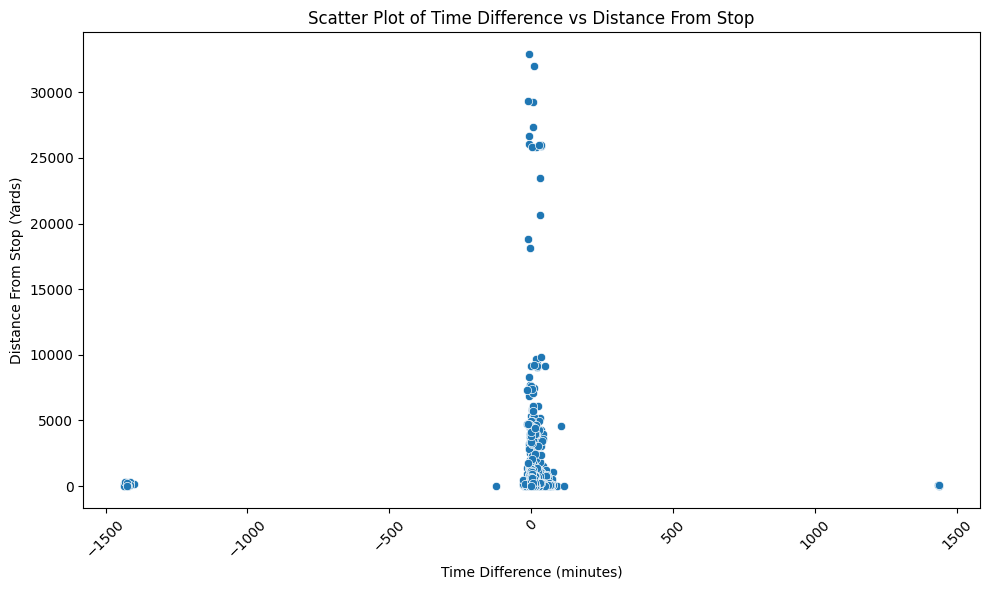

In [43]:
data_cleaned['TimeDifference'] = (data_cleaned['ExpectedArrivalTime'] - data_cleaned['ScheduledArrivalTime']).dt.total_seconds() / 60
subset_data = data_cleaned.sample(n=10000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_data, x='TimeDifference', y='DistanceFromStop')
plt.title("Scatter Plot of Time Difference vs Distance From Stop")
plt.xlabel("Time Difference (minutes)")
plt.ylabel("Distance From Stop (Yards)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
correlation = data_cleaned['DistanceFromStop'].corr(data_cleaned['TimeDifference'])
print("Correlation between DistanceFromStop and TimeDifference:", correlation)

Correlation between DistanceFromStop and TimeDifference: 0.8505418474638499


In [ ]:
subset_data = data_cleaned.sample(n=10000, random_state=42)

fig = px.scatter(
    subset_data,
    x='TimeDifference',
    y='DistanceFromStop',
    title="Scatter Plot of Time Difference vs Distance From Stop",
    labels={
        "TimeDifference": "Time Difference (minutes)",
        "DistanceFromStop": "Distance From Stop (Yards)"
    },
    hover_data={
        'VehicleRef': True,
        'PublishedLineName': True,
        'RecordedAtTime': True,
        'ScheduledArrivalTime': True,
        'ExpectedArrivalTime' : True
        },
)
fig.show()

In [45]:
data_cleaned.sample(100)

RecordedAtTime  DirectionRef PublishedLineName  \
4699989 2017-06-22 07:18:20             0                B2   
4832721 2017-06-22 16:19:19             0               Q76   
5733050 2017-06-27 00:06:33             1              Bx39   
4993515 2017-06-23 09:30:01             0               M20   
1308965 2017-06-06 22:13:32             1           Q44-SBS   
...                     ...           ...               ...   
253286  2017-06-02 01:14:39             0                B3   
3184946 2017-06-15 08:27:45             1               B83   
1272263 2017-06-06 18:42:44             1               X11   
6206770 2017-06-28 20:40:16             1               M72   
1776925 2017-06-08 19:26:19             0              Bx31   

                            OriginName  OriginLat  OriginLong  \
4699989             E 16 ST/QUENTIN RD  40.607384  -73.957176   
4832721  165 ST TERM/165 ST TERM BAY 3  40.708107  -73.795555   
5733050           E 241 ST/CRANFORD AV  40.903339  -73.850052   
4993515          STATE ST/WHITEHALL ST  40.702419  -74.013046   
1308965             BOSTON RD/E 180 ST  40.842560  -73.878334   
...                                ...        ...         ...   
253286                 25 AV/HARWAY AV  40.593021  -73.992180   
3184946      VAN SINDEREN AV/FULTON ST  40.678089  -73.903572   
1272263              BROADWAY/WORTH ST  40.716103  -74.004768   
6206770                E 72 ST/YORK AV  40.766949  -73.954117   
1776925             TREMONT AV/LANE AV  40.840866  -73.842453   

                        DestinationName  DestinationLat  DestinationLong  \
4699989                     KINGS PLAZA       40.609428       -73.921753   
4832721    COLLEGE PT 20 AV via F LEWIS       40.782139       -73.836708   
5733050                     GUN HILL RD       40.877853       -73.866669   
4993515   LINCOLN CENTER 66 ST via 8 AV       40.771797       -73.982361   
1308965  SELECT BUS JAMAICA via MAIN ST       40.704933       -73.793320   
...                                 ...             ...              ...   
253286      BERGEN BCH E 71 ST via AV U       40.619881       -73.907265   
3184946       SPRING CREEK GATEWAY MALL       40.652821       -73.876755   
1272263                          TRAVIS       40.586792       -74.199142   
6206770      WEST SIDE FREEDOM PL XTOWN       40.776489       -73.988724   
1776925             WOODLAWN KATONAH AV       40.902779       -73.868317   

        VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude  \
4699989  NYCT_4611                 40.608631                 -73.921387   
4832721  NYCT_4203                 40.783203                 -73.836495   
5733050  NYCT_5800                 40.892286                 -73.857992   
4993515  NYCT_4115                 40.771801                 -73.982281   
1308965  NYCT_6005                 40.732103                 -73.824625   
...            ...                       ...                        ...   
253286   NYCT_7164                 40.595982                 -73.983990   
3184946  NYCT_4842                 40.662703                 -73.891126   
1272263  NYCT_2734                 40.610379                 -74.120824   
6206770  NYCT_5234                 40.776910                 -73.977617   
1776925   NYCT_291                 40.886875                 -73.847124   

                NextStopPointName ArrivalProximityText  DistanceFromStop  \
4699989          FLATBUSH AV/AV U        < 1 stop away             260.0   
4832721             132 ST /20 AV          approaching             119.0   
5733050  WHITE PLAINS RD/E 231 ST              at stop              20.0   
4993515          BROADWAY/W 64 ST              at stop               0.0   
1308965          MAIN ST/JEWEL AV        < 1 stop away             239.0   
...                           ...                  ...               ...   
253286               AV U/W 12 ST          approaching              69.0   
3184946    NEW LOTS AV/VERMONT ST              at sto

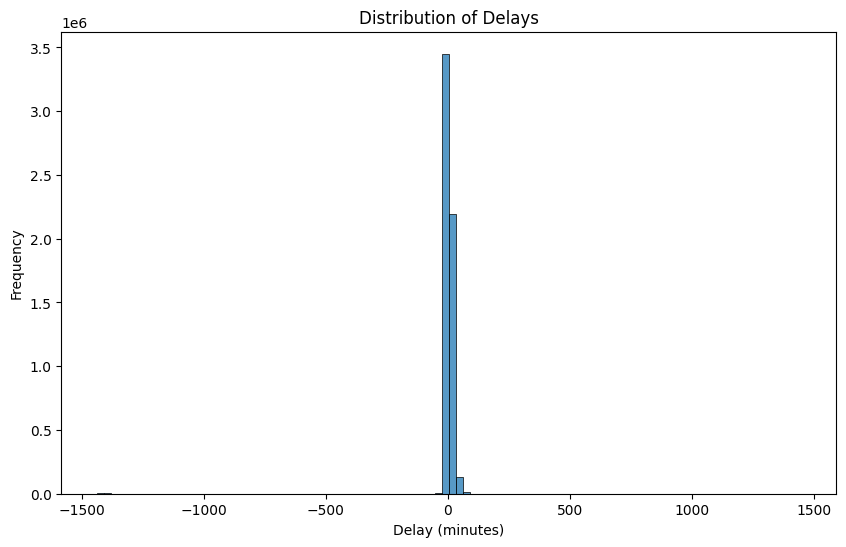

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='TimeDifference', bins=100)
plt.title('Distribution of Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [55]:
subset_data = data_cleaned.sample(n=10000, random_state=42)

fig = px.scatter(
    subset_data,
    x='TimeDifference',
    y='RecordedAtTime',
    title="Scatter Plot of Time Difference vs Distance From Stop",
    labels={
        "TimeDifference": "Time Difference (minutes)",
        "RecordedAtTime": "Recorded At Time"
    },
    hover_data={
        'VehicleRef': True,
        'PublishedLineName': True,
        'RecordedAtTime': True,
        'ScheduledArrivalTime': True,
        'ExpectedArrivalTime' : True
        },
)
fig.show()

## Feature engineering (ie: Cyclical Encoding for timetables)